#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading dataset

In [2]:
df=pd.read_csv(r"C:\edubridge datas\AirPassengers.CSV")

In [3]:
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


#### Initial 5 row fetching

In [4]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Final 5 row reading

In [5]:
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


#### Information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


#### Statistical information about the dataset

In [7]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


#### Checking null value existance

In [8]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

#### Finding the duplicat value in the dataset

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
139    False
140    False
141    False
142    False
143    False
Length: 144, dtype: bool

In [10]:
df.duplicated().sum()

0

#### checking how much column how much row in the dataset

In [11]:
df.shape

(144, 2)

#### Datatype of each feature

In [12]:
df.dtypes

Month         object
Passengers     int64
dtype: object

#### Converting dtype of month from object to time

In [13]:
df['Month']=pd.to_datetime(df['Month'],format='%Y-%m')##dtype of month in the form of object converting it in to date format bz time series need time

In [14]:
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [15]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

#### Index creation

In [16]:
df.index=df['Month'] ## creating an index

In [17]:
df

,Month,Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [18]:
del df['Month']

In [19]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


#### Graphical representation of data

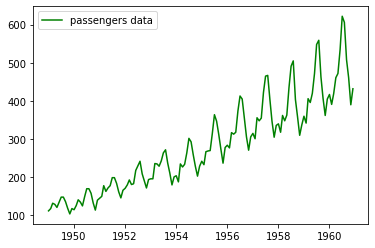

In [20]:
plt.plot(df,color='green',label='passengers data')
plt.legend()
plt.show()

#### Random selection of 7 data to calculate mean

In [21]:
r_mean=df.rolling(7).mean()#randmly calucating 7 values mean

In [22]:
print(r_mean)

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  500.857143
1960-09-01  517.571429
1960-10-01  523.571429
1960-11-01  513.428571
1960-12-01  507.714286

[144 rows x 1 columns]


In [23]:
r_std=df.rolling(7).std()

In [24]:
r_std

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,89.523607
1960-09-01,75.403044
1960-10-01,67.510140


#### Graphical represntation of 3 set of catogory

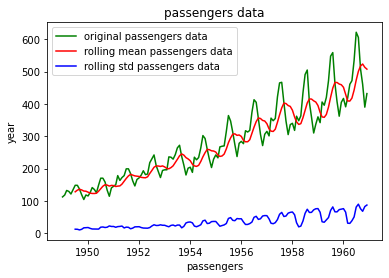

In [25]:
plt.plot(df,color='green',label='original passengers data')
plt.plot(r_mean,color='red',label='rolling mean passengers data')
plt.plot(r_std,color="blue",label="rolling std passengers data")
plt.title("passengers data")
plt.legend(loc="best")
plt.xlabel('passengers')
plt.ylabel('year')
plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
ad_ft=adfuller(df,autolag='AIC') #reduce information

In [28]:
ad_ft

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [29]:
output=pd.DataFrame({'values':[ad_ft[0],ad_ft[1],ad_ft[2],ad_ft[3],ad_ft[4]['1%'],ad_ft[4]['5%'],ad_ft[4]['10%']],'metric':['Test statistics','P Value','No. of Lags Used','No. of Observation used','Critical Value 1%','Critical Value 5%','Critical Value 10%']})

In [30]:
output

,values,metric
0,0.815369,Test statistics
1,0.991880,P Value
2,13.000000,No. of Lags Used
3,130.000000,No. of Observation used
4,-3.481682,Critical Value 1%
5,-2.884042,Critical Value 5%
6,-2.578770,Critical Value 10%


#### Correlation with different lag value

In [31]:
auto_df=df['Passengers'].autocorr(lag=1)

In [32]:
auto_df

0.9601946480498523

In [33]:
auto_df1=df['Passengers'].autocorr(lag=3)

In [34]:
auto_df1

0.837394765081794

In [35]:
auto_df5=df['Passengers'].autocorr(lag=5)

In [36]:
auto_df5

0.7859431491184304

In [37]:
auto_df9=df['Passengers'].autocorr(lag=9)

In [38]:
auto_df9

0.8278519011167601

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

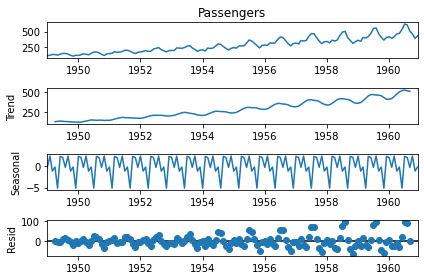

In [40]:
decompose_df=seasonal_decompose(df['Passengers'],model='additive',period=7)
decompose_df.plot()
plt.show()

In [41]:
df['Date']=df.index

In [42]:
df

,Passengers,Date
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01
...,...,...
1960-08-01,606,1960-08-01
1960-09-01,508,1960-09-01
1960-10-01,461,1960-10-01


In [43]:
train=df[df['Date']<pd.to_datetime('1960-08',format='%Y-%m')]

In [44]:
train

,Passengers,Date
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01
...,...,...
1960-03-01,419,1960-03-01
1960-04-01,461,1960-04-01
1960-05-01,472,1960-05-01


In [45]:
train['train']=train['Passengers']

In [46]:
train

,Passengers,Date,train
Month,,,
1949-01-01,112,1949-01-01,112
1949-02-01,118,1949-02-01,118
1949-03-01,132,1949-03-01,132
1949-04-01,129,1949-04-01,129
1949-05-01,121,1949-05-01,121
...,...,...,...
1960-03-01,419,1960-03-01,419
1960-04-01,461,1960-04-01,461
1960-05-01,472,1960-05-01,472


In [47]:
del train['Date']

In [48]:
del train['Passengers']

In [49]:
train

,train
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-03-01,419
1960-04-01,461
1960-05-01,472


In [50]:
test=df[df['Date']>=pd.to_datetime('1960-08',format='%Y-%m')]
test

,Passengers,Date
Month,,
1960-08-01,606,1960-08-01
1960-09-01,508,1960-09-01
1960-10-01,461,1960-10-01
1960-11-01,390,1960-11-01
1960-12-01,432,1960-12-01


In [51]:
del test['Date']

In [52]:
test['test']=test['Passengers']

In [53]:
del test['Passengers']

In [54]:
test

,test
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


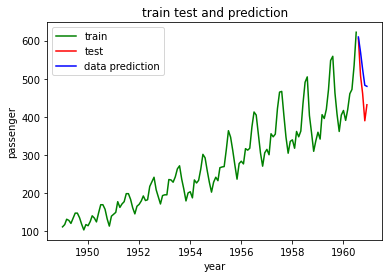

In [67]:
plt.plot(train,color='green',label='train')
plt.plot(test,color='red',label='test')
plt.plot(forcast,color='blue',label="data prediction")
plt.title("train test and prediction")
plt.legend()
plt.xlabel('year')
plt.ylabel("passenger")
plt.show()

In [ ]:
pip install pmdarima

In [57]:
from pmdarima.arima import auto_arima

In [58]:
model=auto_arima(train)

In [59]:
model.fit(train)

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [60]:
forcast=model.predict(n_periods=len(test))

#### Creating dataframe to check actual and predicted value

In [61]:
forcast=pd.DataFrame(forcast,index=test.index,columns=['prediction'])

In [62]:
forcast

,prediction
Month,
1960-08-01,609.537719
1960-09-01,569.572562
1960-10-01,524.516336
1960-11-01,483.040356
1960-12-01,480.301280


#### importing modeule

In [63]:
from math import sqrt

In [64]:
from sklearn.metrics import mean_squared_error

#### means square calculating

In [65]:
rms=sqrt(mean_squared_error(test,forcast))

In [66]:
rms

61.36373890655744